# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [10]:
from metrics import *

In [18]:
X, y = load_iris(return_X_y=True)
X = X[y<=1]
y = y[y<=1]
y[y==0] = -1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True)
    
    

In [5]:
def plot_f1_wrt_f2(X, f1, f2, markercolor='r'):
    plt.plot(X[:,f2], X[:, f1], markercolor)


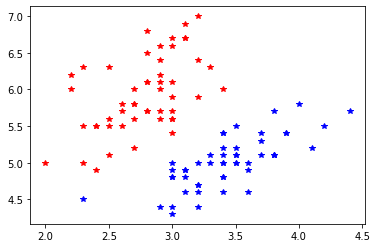

In [25]:
plot_f1_wrt_f2(X[y==1], 0, 1, markercolor='*r')
plot_f1_wrt_f2(X[y==-1], 0, 1, markercolor='*b')

In [7]:
class SVM:
    def __init__(self, d, C):
        self.w = np.random.uniform(-10, 10, size=(d,1))
        self.b = np.random.uniform(-10, 10, )
        self.d = d
        self.C = C

    def fit(self, X_train, y_train, n_iter=10000, lambda_reg=1, learning_rate=1e-3):
        for iteration in range(n_iter):
            predictions = self.predict(X_train)
            grad_w = (2*lambda_reg/self.C) * self.w
            grad_b = 0
            for i in range(X_train.shape[0]):
                if predictions[i] != y_train[i]:
                    grad_w -= (y_train[i] * X_train[i, :]).reshape(-1, 1)
                    grad_b -= y_train[i]
            self.w = self.w - learning_rate * grad_w
            self.b = self.b - learning_rate * grad_b
            

    def _sign(self, u):
        sign_u = u.copy()
        sign_u[sign_u > 0] = 1
        sign_u[sign_u <= 0] = -1
        return sign_u
    
    def _linear_proj(self, X):
        return X.dot(self.w) + self.b  

    def predict(self, X):
        return self._sign(self._linear_proj(X))

In [8]:
svm = SVM(d=X_train.shape[1], C=0.5)
svm.fit(X_train, y_train)

yhat_train = svm.predict(X_train)

In [9]:

print(np.sum(yhat_train.flatten() == y_train)/len(y_train))

1.0


In [21]:
yhat_test = svm.predict(X_test).flatten()

In [22]:
accuracy(yhat_test, y_test)

1.0